In [18]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import ad as ad

## Calculate Capacitence  

In [19]:
E_0 = 8.85418782E-12 # \epsilon_0
u_0 = 1.25663706E-6 # \mu_0

'''w = 0.498 # length of capacitor
a = 0.011 # outer radius of inner pipe
b = 0.013 # inner radius of outer pipe'''

l_c = 0.498 # +- 0.001 meters length of the cylidrical capacitor
a_c = (0.022326)/2 # outside diameter divided by 2 for radius
b_c = (0.026264)/2 # same as above

C_calc = ((2*np.pi*E_0*l_c)/(np.log(b_c/a_c)))
print("Calculated capacitance of premade capacitor: %s nF" % (C_calc*10**9))

Calculated capacitance of premade capacitor: 0.170547574204 nF


## Actuall measuremnts of the coils we wound:
first the small coil, then the one we ended up using which was a bit larger in size and turns. 

In [20]:
f_target = 5.0E5 # Hz

omega_target = 2*np.pi*f_target # omega(the resonant freq) is 2pi*f

#C = 1.65844E-10 # capacitance of pre-made capacitor
L_target = 1/((omega_target**2)*C_calc) # target inductance to make target resonant frequency (from equation 1)
print('ballpark inductance = %s mH' % (L_target*10**3))

ballpark inductance = 0.594093373154 mH


## Calculate Inductance
For both inductors.

> Small inductor N = 150 turns 

> Large inductor N = 575 turns *inductor used for experiment*

In [21]:

n1 = 150 # turns on the solinoid 
inductor1Length = .13256 # m
inductor1Radius = 0.026694 # m
L_small = ((u_0*np.pi*(n1**2)*(inductor1Radius**2))/inductor1Length)
print('inductance of small coil: %s mH' % (L_small*10**3))


ws = 1/np.sqrt(L_small*C_calc)
fs = ws/(2*np.pi)

print('first aproximation of thoretical frequency for small inductor = %s Khz' % (fs*10**-3))
#print('coil density = %s (turns per cm)' % (n1/(inductor1Length*10**2)))
#N = np.sqrt((L_target*inductorLength)/(u_0*np.pi*(inductorRadius**2)))

#print('Number of turns = %s' % round(N))

inductance of small coil: 0.4774820735335626 mH
first aproximation of thoretical frequency for small inductor = 557.72334415 Khz


In [22]:
n2 = 575 # turns on the solinoid
inductor2Length = 0.509
inductor2Radius = (0.0782 - 0.00086)/2

L_large = ((u_0*np.pi*(n2**2)*(inductor2Radius**2))/inductor2Length)
print('inductance of large coil: %s mH' % (L_large*10**3))

wl = 1/np.sqrt(L_large*C_calc)
fl = wl/(2*np.pi)

print('first aproximation of thoretical frequency for large inductor = %s Khz' % (fl*10**-3))
#print('coil density = %s (turns per cm)' % (n2/(inductor2Length*10**2)))

inductance of large coil: 3.834652266330525 mH
first aproximation of thoretical frequency for large inductor = 196.804200987 Khz


##### These first values gave us a rough area in which to look for amplitude peaks.

### Retrive data from file and plot

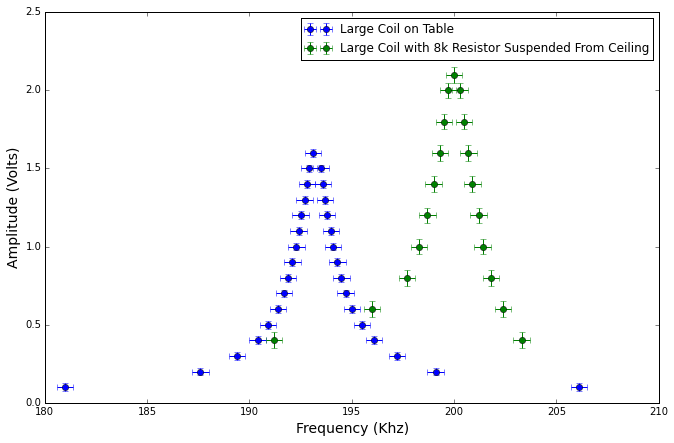

In [23]:
#frequency Khz, amplitude Volts, phase microseconds
a = np.genfromtxt('data.txt', delimiter = ',')
#print(a)
b = np.genfromtxt('8kResistorLargeCoil1.txt', delimiter = ',')
c = np.genfromtxt('smallCoil1.txt', delimiter = ',')

plt.figure(figsize = (11,7))
plt.errorbar(a[ :,0],a[:,1], xerr=0.4, yerr=0.025, marker = 'o', linestyle = 'None', label = 'Large Coil on Table')
plt.xlabel('Frequency (Khz)', size = '14')
plt.ylabel('Amplitude (Volts)', size = '14')
plt.errorbar(b[ :,0],b[:,1], xerr=0.4, yerr=0.05, marker = 'o', linestyle = 'None', label='Large Coil with 8k Resistor Suspended From Ceiling')
#plt.plot(a[ :,0],a[:,1],'+', linestyle = 'None' )
#plt.plot(b[ :,0],b[:,1], 'o')
#plt.plot(c[ :,0],c[:,1], 'o') # small coil data
#plt.plot(a[ :,0], a[ :,2])
#plt.plot(165.8,1,'o')
plt.legend()
plt.savefig("peakPlot.png", dpi=400)

plt.show()




In [24]:
'''

data1 +- .025 volts and +- 0.1 khz

8data +- 0.05 volts and +- 0.1 khz
SmallData +- 0.25 volts and +- 1khz

'''
row = 10
print(b[row,0], b[row,1])

200.3 2.0


## calculate the speed of light.
Using peaks of resonance found experimentally.

In [1]:
f = 193.1e3

speedOfLight = ((2*np.pi**2*f*inductor2Radius*n2)*np.sqrt((2*l_c)/(inductor2Length*np.log(b_c/a_c))))
print(format(speedOfLight,"e"))

actuall_c = 2.99794e8

100*((actuall_c - speedOfLight)/speedOfLight)

NameError: name 'np' is not defined

In [36]:
f = 200.0e3

speedOfLight = ((2*np.pi**2*f*inductor2Radius*n2)*np.sqrt((2*l_c)/(inductor2Length*np.log(b_c/a_c))))
print(format(speedOfLight,"e"))

actuall_c = 2.99794e8

100*((actuall_c - speedOfLight)/speedOfLight)

3.046606e+08


-1.5973934127984095

In [26]:
# now with correction factors

gamma_c = ((b_c-a_c)/(np.pi*l_c))*np.log((np.pi*l_c)/(b_c-a_c))

c_corr = speedOfLight*(np.sqrt(1+gamma_c))

print(gamma_c)
print(format(c_corr, 'e'))

100*((actuall_c - c_corr)/c_corr)

0.00840427353961
4.679324e+07


540.67795775121624

## Add Uncertainties
To our existing data for analysis.

In [27]:
import uncertainties as u
#import uncertainties.math

frequencyA = np.ndarray.tolist(a[:,0])
voltageA = np.ndarray.tolist(a[:,1])

aferror = [u.ufloat(val, .1) for val in frequencyA]
averror = [u.ufloat(val, .025) for val in voltageA]

frequencyB = np.ndarray.tolist(b[:,0])
voltageB = np.ndarray.tolist(b[:,1])

bferror = [u.ufloat(val, .1) for val in frequencyB]
bverror = [u.ufloat(val, .05) for val in voltageB]

frequencyC = np.ndarray.tolist(c[:,0])
voltageC = np.ndarray.tolist(c[:,1])

cferror = [u.ufloat(val, 1.0) for val in frequencyC]
cverror = [u.ufloat(val, 0.25) for val in voltageC]


##################


### High / Low calculations for error analysis 

In [37]:
SOLa = 2*np.pi**2*u.ufloat(193.1e3, .1)*n2*u.ufloat(inductor2Radius,.0001)*(((2*u.ufloat(l_c, .0002))/(u.ufloat(inductor2Length,.0002)*(np.log((b_c-.00005)) - np.log((a_c+.00005)))))**(1/2))
print(SOLa)

(3.019+/-0.008)e+08


In [29]:
print((u.ufloat(2,1)*u.ufloat(2,.1))**(1/2))

2.0+/-0.5


In [30]:
print(( 2.868 + 3.018)/2.0)
#print(2.946 - 2.934)

2.9429999999999996


In [31]:
SOLb = 2*np.pi**2*u.ufloat(200e3, .1)*n2*u.ufloat(inductor2Radius,.0001)*(((2*u.ufloat(l_c, .0002))/(u.ufloat(inductor2Length,.0002)*(np.log((b_c+.00005)) - np.log((a_c+.00005)))))**(1/2))
print(SOLb)

(3.053+/-0.008)e+08


In [32]:
bCorF = ((.8e3/(4*np.pi*200e3*L_large))**2)
print(bCorF)

0.006890461013314607


In [33]:
print(SOLb * (1+(1/bCorF)))

(4.461+/-0.012)e+10
